In [1]:
from qiskit import QuantumRegister
import numpy as np
from gymnasium.spaces import Box
from rl_qoc import QuantumEnvironment, BenchmarkConfig
from qiskit.circuit import QuantumCircuit, ParameterVector, Gate
from qiskit.circuit.library import CZGate, RXGate, XGate
from rl_qoc import (
    QEnvConfig,
    ExecutionConfig,
    ChannelRewardConfig,
)
from rl_qoc.qibo import QiboConfig
from gymnasium.wrappers import ClipAction


def param_circuit(
    qc: QuantumCircuit, params: ParameterVector, qreg: QuantumRegister, **kwargs
):
    target = kwargs["target"]
    gate: Gate = target["gate"]
    custom_gate = Gate(f"{gate.name}_cal", 2, params.params)
    qc.append(custom_gate, qreg)

    return qc


def gate_rule():
    pass


def get_backend():
    return "qibolab"


target = {"gate": XGate(), "physical_qubits": [0]}
instruction_durations = {}
action_space_low = np.array(
    [0.0, 16], dtype=np.float32
)  # [amp, phase, phase, duration]
action_space_high = np.array(
    [1.0, 160], dtype=np.float32
)  # [amp, phase, phase, duration]
action_space = Box(action_space_low, action_space_high)

qibo_config = QiboConfig(
    param_circuit,
    get_backend(),
    platform="dummy",
    physical_qubits=(0, 1),
    gate_rule="rx",
    parametrized_circuit_kwargs={"target": target},
    instruction_durations=None,
)
q_env_config = QEnvConfig(
    target=target,
    backend_config=qibo_config,
    action_space=action_space,
    reward_config="state",
    benchmark_config=BenchmarkConfig(0),
    execution_config=ExecutionConfig(
        batch_size=32, sampling_paulis=50, n_shots=1000, n_reps=1
    ),
)

env = QuantumEnvironment(q_env_config)

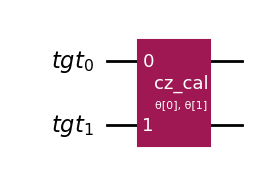

In [2]:
env.circuits[0].draw(output="mpl")

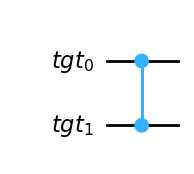

In [3]:
env.baseline_circuits[0].draw(output="mpl")

In [4]:
from rl_qoc import CustomPPO
from rl_qoc.agent import TrainFunctionSettings, TotalUpdates, TrainingConfig
from rl_qoc.helpers import load_from_yaml_file

file_name = "agent_config.yaml"

agent_config = load_from_yaml_file(file_name)

In [5]:
ppo = CustomPPO(agent_config, ClipAction(env))
total_updates = TotalUpdates(500)
# hardware_runtime = HardwareRuntime(300)
training_config = TrainingConfig(
    training_constraint=total_updates,
    target_fidelities=[0.999, 0.9999],
    lookback_window=10,
    anneal_learning_rate=True,
    std_actions_eps=1e-2,
)

train_function_settings = TrainFunctionSettings(
    plot_real_time=False,
    print_debug=False,
    num_prints=5,
    hpo_mode=False,
    clear_history=False,
)

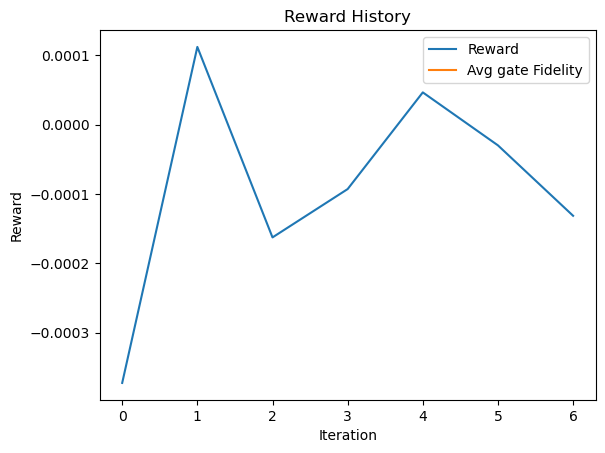

  1%|▏         | 7/500 [00:25<29:40,  3.61s/it]

Sending Estimator job...


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Loading platform dummy


2024-11-25 16:25:12 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Using qibolab (dummy) backend on /CPU:0


2024-11-25 16:25:12 INFO Using qibolab (dummy) backend on /CPU:0


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Loading platform dummy


2024-11-25 16:25:12 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x3a02bc750>.


2024-11-25 16:25:12 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x3a02bc750>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Connecting to dummy instrument.


2024-11-25 16:25:12 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x3a02bf7d0>.


2024-11-25 16:25:12 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x3a02bf7d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Minimal execution time (unrolling): 0.15091200000000002


2024-11-25 16:25:12 INFO Minimal execution time (unrolling): 0.15091200000000002


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Disconnecting dummy instrument.


2024-11-25 16:25:12 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Loading platform dummy


2024-11-25 16:25:12 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x392295850>.


2024-11-25 16:25:12 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x392295850>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Connecting to dummy instrument.


2024-11-25 16:25:12 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31ae76750>.


2024-11-25 16:25:12 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31ae76750>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:12 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Disconnecting dummy instrument.


2024-11-25 16:25:12 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Loading platform dummy


2024-11-25 16:25:12 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394f12650>.


2024-11-25 16:25:12 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394f12650>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Connecting to dummy instrument.


2024-11-25 16:25:12 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396e52890>.


2024-11-25 16:25:12 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396e52890>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:12 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Disconnecting dummy instrument.


2024-11-25 16:25:12 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Loading platform dummy


2024-11-25 16:25:12 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394d276d0>.


2024-11-25 16:25:12 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394d276d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Connecting to dummy instrument.


2024-11-25 16:25:12 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394d25f50>.


2024-11-25 16:25:12 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394d25f50>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:12 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Disconnecting dummy instrument.


2024-11-25 16:25:12 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Loading platform dummy


2024-11-25 16:25:12 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x39203c590>.


2024-11-25 16:25:12 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x39203c590>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Connecting to dummy instrument.


2024-11-25 16:25:12 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x39497f950>.


2024-11-25 16:25:12 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x39497f950>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:12 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Disconnecting dummy instrument.


2024-11-25 16:25:12 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Loading platform dummy


2024-11-25 16:25:12 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396d940d0>.


2024-11-25 16:25:12 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396d940d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Connecting to dummy instrument.


2024-11-25 16:25:12 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:12]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396d94910>.


2024-11-25 16:25:12 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396d94910>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394cb9050>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394cb9050>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394cb9c90>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394cb9c90>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x1768aa790>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x1768aa790>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396e96310>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396e96310>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x3967b6b10>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x3967b6b10>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396d84b90>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396d84b90>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394ef4150>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394ef4150>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x391e1c3d0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x391e1c3d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x39214ae10>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x39214ae10>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x1763478d0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x1763478d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x31ba622d0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x31ba622d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x3a02c04d0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x3a02c04d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x1764b4110>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x1764b4110>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31bab33d0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31bab33d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396ce2710>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396ce2710>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396e185d0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396e185d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394e61c50>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394e61c50>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394df87d0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394df87d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396d8d610>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396d8d610>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x38e602a90>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x38e602a90>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396e122d0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396e122d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396857fd0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396857fd0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394ddd690>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394ddd690>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394d1e610>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394d1e610>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394ec8dd0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394ec8dd0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394f2e310>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394f2e310>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x3967c9710>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x3967c9710>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394ecb090>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394ecb090>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396e09250>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396e09250>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394d67690>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394d67690>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x31a899a50>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x31a899a50>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31a89ae50>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31a89ae50>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394ee0410>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394ee0410>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x38e326950>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x38e326950>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394dc9b90>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394dc9b90>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394e03b90>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394e03b90>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x31a8676d0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x31a8676d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31aed4b90>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31aed4b90>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x38e3b9dd0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x38e3b9dd0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x38e3bba50>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x38e3bba50>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394f57f10>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394f57f10>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x391e13090>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x391e13090>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025152


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025152


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Using qibolab (dummy) backend on /CPU:0


2024-11-25 16:25:13 INFO Using qibolab (dummy) backend on /CPU:0


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x31a8a5690>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x31a8a5690>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x1763c2f50>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x1763c2f50>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.025493568


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.025493568


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394b9ad10>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394b9ad10>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394b9bd10>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394b9bd10>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396814b10>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396814b10>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x391e88e50>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x391e88e50>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394901c10>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394901c10>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x391fbf910>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x391fbf910>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x391b7f550>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x391b7f550>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x3922726d0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x3922726d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x3921fde10>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x3921fde10>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396c7cc10>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396c7cc10>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396b52290>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396b52290>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396b50410>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396b50410>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394d60290>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394d60290>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31af28f10>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31af28f10>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x391e2db50>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x391e2db50>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x392273ad0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x392273ad0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396a56690>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396a56690>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31af490d0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31af490d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x1765972d0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x1765972d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31af48e50>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31af48e50>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x391e9c7d0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x391e9c7d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x3948cd690>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x3948cd690>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x3948cf090>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x3948cf090>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31baa2990>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31baa2990>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396b2b610>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396b2b610>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x391feb450>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x391feb450>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x392153690>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x392153690>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x392152d90>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x392152d90>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394a24650>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394a24650>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394a24b90>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394a24b90>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x3948f0dd0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x3948f0dd0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31baa2bd0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31baa2bd0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x391e2ca10>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x391e2ca10>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x3949f9290>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x3949f9290>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x392270210>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x392270210>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31af49c90>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31af49c90>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396791cd0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396791cd0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x391f9b750>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x391f9b750>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396bb4a90>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396bb4a90>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x39247ff90>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x39247ff90>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x392018b90>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x392018b90>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31af4bb50>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31af4bb50>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x1768e0f10>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x1768e0f10>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x1764e8bd0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x1764e8bd0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x1768e30d0>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x1768e30d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x392025a10>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x392025a10>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396a37d90>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396a37d90>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x39499ec10>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x39499ec10>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396a05690>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396a05690>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396a05e90>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396a05e90>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Loading platform dummy


2024-11-25 16:25:13 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x1765fc590>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x1765fc590>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to dummy instrument.


2024-11-25 16:25:13 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x1765fc390>.


2024-11-25 16:25:13 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x1765fc390>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Minimal execution time (unrolling): 0.004248928


2024-11-25 16:25:13 INFO Minimal execution time (unrolling): 0.004248928


[Qibo 0.2.13|INFO|2024-11-25 16:25:13]: Disconnecting dummy instrument.


2024-11-25 16:25:13 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Loading platform dummy


2024-11-25 16:25:14 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Using qibolab (dummy) backend on /CPU:0


2024-11-25 16:25:14 INFO Using qibolab (dummy) backend on /CPU:0


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Loading platform dummy


2024-11-25 16:25:14 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396b05690>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396b05690>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to dummy instrument.


2024-11-25 16:25:14 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x38e36ba90>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x38e36ba90>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Minimal execution time (unrolling): 0.06288


2024-11-25 16:25:14 INFO Minimal execution time (unrolling): 0.06288


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Disconnecting dummy instrument.


2024-11-25 16:25:14 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Loading platform dummy


2024-11-25 16:25:14 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x31a9422d0>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x31a9422d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to dummy instrument.


2024-11-25 16:25:14 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31a8a2750>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x31a8a2750>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Minimal execution time (unrolling): 0.010480000000000001


2024-11-25 16:25:14 INFO Minimal execution time (unrolling): 0.010480000000000001


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Disconnecting dummy instrument.


2024-11-25 16:25:14 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Loading platform dummy


2024-11-25 16:25:14 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x39212dcd0>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x39212dcd0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to dummy instrument.


2024-11-25 16:25:14 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x3921229d0>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x3921229d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Minimal execution time (unrolling): 0.010480000000000001


2024-11-25 16:25:14 INFO Minimal execution time (unrolling): 0.010480000000000001


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Disconnecting dummy instrument.


2024-11-25 16:25:14 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Loading platform dummy


2024-11-25 16:25:14 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x3921234d0>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x3921234d0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to dummy instrument.


2024-11-25 16:25:14 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x392123c10>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x392123c10>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Minimal execution time (unrolling): 0.010480000000000001


2024-11-25 16:25:14 INFO Minimal execution time (unrolling): 0.010480000000000001


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Disconnecting dummy instrument.


2024-11-25 16:25:14 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Loading platform dummy


2024-11-25 16:25:14 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x38e84f410>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x38e84f410>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to dummy instrument.


2024-11-25 16:25:14 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x38e84f590>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x38e84f590>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Minimal execution time (unrolling): 0.010480000000000001


2024-11-25 16:25:14 INFO Minimal execution time (unrolling): 0.010480000000000001


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Disconnecting dummy instrument.


2024-11-25 16:25:14 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Loading platform dummy


2024-11-25 16:25:14 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x17645dc10>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x17645dc10>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to dummy instrument.


2024-11-25 16:25:14 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x17645e590>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x17645e590>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Minimal execution time (unrolling): 0.010480000000000001


2024-11-25 16:25:14 INFO Minimal execution time (unrolling): 0.010480000000000001


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Disconnecting dummy instrument.


2024-11-25 16:25:14 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Loading platform dummy


2024-11-25 16:25:14 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x38e38aa50>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x38e38aa50>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to dummy instrument.


2024-11-25 16:25:14 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x17659c090>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x17659c090>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Minimal execution time (unrolling): 0.010480000000000001


2024-11-25 16:25:14 INFO Minimal execution time (unrolling): 0.010480000000000001


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Disconnecting dummy instrument.


2024-11-25 16:25:14 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Loading platform dummy


2024-11-25 16:25:14 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394d13510>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394d13510>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to dummy instrument.


2024-11-25 16:25:14 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394cbed10>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x394cbed10>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Minimal execution time (unrolling): 0.010480000000000001


2024-11-25 16:25:14 INFO Minimal execution time (unrolling): 0.010480000000000001


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Disconnecting dummy instrument.


2024-11-25 16:25:14 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Loading platform dummy


2024-11-25 16:25:14 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396c43510>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x396c43510>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to dummy instrument.


2024-11-25 16:25:14 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x3948ca790>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x3948ca790>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Minimal execution time (unrolling): 0.010480000000000001


2024-11-25 16:25:14 INFO Minimal execution time (unrolling): 0.010480000000000001


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Disconnecting dummy instrument.


2024-11-25 16:25:14 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Loading platform dummy


2024-11-25 16:25:14 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x391fa8c50>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x391fa8c50>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to dummy instrument.


2024-11-25 16:25:14 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x3948ca050>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x3948ca050>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Minimal execution time (unrolling): 0.010480000000000001


2024-11-25 16:25:14 INFO Minimal execution time (unrolling): 0.010480000000000001


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Disconnecting dummy instrument.


2024-11-25 16:25:14 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Loading platform dummy


2024-11-25 16:25:14 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394d13fd0>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x394d13fd0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to dummy instrument.


2024-11-25 16:25:14 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396b21fd0>.


2024-11-25 16:25:14 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x396b21fd0>.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Minimal execution time (unrolling): 0.010480000000000001


2024-11-25 16:25:14 INFO Minimal execution time (unrolling): 0.010480000000000001


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Disconnecting dummy instrument.


2024-11-25 16:25:14 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-25 16:25:14]: Loading platform dummy


2024-11-25 16:25:14 INFO Loading platform dummy


In [ ]:
ppo.train(training_config, train_function_settings)